<a href="https://colab.research.google.com/github/Fardeen210/Predictive-Maintenance-of-Air-Compressor-System-using-Supervised-Machine-Learning/blob/main/Metro_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/MyDrive/Dataset/MetroPT3(AirCompressor).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
df=pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

# **Data Preprocessing**

**As datasett doesn.t have missing values there is no need to worry**

In [ ]:
#checking null values
df.isnull().sum()

,0
Unnamed: 0,0
timestamp,0
TP2,0
TP3,0
H1,0
DV_pressure,0
Reservoirs,0
Oil_temperature,0
Motor_current,0
COMP,0


In [ ]:
#from info we get that timestamp is object type, so we should convert it into date_time.
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Here creating  a summary of the dataset
print("Time range of the dataset:")
print("Start:", df['timestamp'].min())
print("End:", df['timestamp'].max())
print("Duration:", df['timestamp'].max() - df['timestamp'].min())

Time range of the dataset:
Start: 2020-02-01 00:00:00
End: 2020-09-01 03:59:50
Duration: 213 days 03:59:50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

From the given problem, They provided additional information on Failure reports:
The dataset is unlabeled, but the failure reports provided by the company are available in the following table.

Nr.     Start Time	End Time  Failure	      Severity	         Report

1	4/18/2020 0:00	   4/18/2020 23:59       Air leak	    High stress
1	5/29/2020 23:30     5/30/2020 6:00	    Air Leak	    High stress	Maintenance

 on 30Apr at 12:00
3	6/5/2020 10:00	   6/7/2020 14:30	        Air Leak	    High stress

Maintenance on 8Jun at 16:00
4	7/15/2020 14:30     7/15/2020 19:00      Air Leak	    High stress	Maintenance on 16Jul at 00:00


Link:https://archive.ics.uci.edu/dataset/791/metropt+3+dataset

data frame created to store all failures and merge with main dataframe

In [ ]:
# Extract the failure events from the provided information
failure_events = [
    {'number': 1, 'start_time': '2020-04-18 00:00', 'end_time': '2020-04-18 23:59', 'failure': 'Air leak', 'severity': 'High stress'},
    {'number': 2, 'start_time': '2020-05-29 23:30', 'end_time': '2020-05-30 06:00', 'failure': 'Air Leak', 'severity': 'High stress', 'maintenance': '2020-04-30 12:00'},
    {'number': 3, 'start_time': '2020-06-05 10:00', 'end_time': '2020-06-07 14:30', 'failure': 'Air Leak', 'severity': 'High stress', 'maintenance': '2020-06-08 16:00'},
    {'number': 4, 'start_time': '2020-07-15 14:30', 'end_time': '2020-07-15 19:00', 'failure': 'Air Leak', 'severity': 'High stress', 'maintenance': '2020-07-16 00:00'}
]

# Converting the DataFrame
failure_df = pd.DataFrame(failure_events)
failure_df['start_time'] = pd.to_datetime(failure_df['start_time'])
failure_df['end_time'] = pd.to_datetime(failure_df['end_time'])

if 'maintenance' in failure_df.columns:
    failure_df['maintenance'] = pd.to_datetime(failure_df['maintenance'], errors='coerce')

print("\nFailure events:")
print(failure_df[['number', 'start_time', 'end_time', 'failure', 'severity']])

# Check the distribution of values for some key columns
print("\nStatistical summary of key sensor readings:")
print(df[['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current']].describe())


Failure events:
   number          start_time            end_time   failure     severity
0       1 2020-04-18 00:00:00 2020-04-18 23:59:00  Air leak  High stress
1       2 2020-05-29 23:30:00 2020-05-30 06:00:00  Air Leak  High stress
2       3 2020-06-05 10:00:00 2020-06-07 14:30:00  Air Leak  High stress
3       4 2020-07-15 14:30:00 2020-07-15 19:00:00  Air Leak  High stress

Statistical summary of key sensor readings:
                TP2           TP3            H1  Oil_temperature  \
count  1.516948e+06  1.516948e+06  1.516948e+06     1.516948e+06   
mean   1.367826e+00  8.984611e+00  7.568155e+00     6.264418e+01   
std    3.250930e+00  6.390951e-01  3.333200e+00     6.516261e+00   
min   -3.200000e-02  7.300000e-01 -3.600000e-02     1.540000e+01   
25%   -1.400000e-02  8.492000e+00  8.254000e+00     5.777500e+01   
50%   -1.200000e-02  8.960000e+00  8.784000e+00     6.270000e+01   
75%   -1.000000e-02  9.492000e+00  9.374000e+00     6.725000e+01   
max    1.067600e+01  1.030200

#Data Visualization to see the behaviour of other sensors when failure occured.

<ipython-input-12-3af81eb0c939>:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()


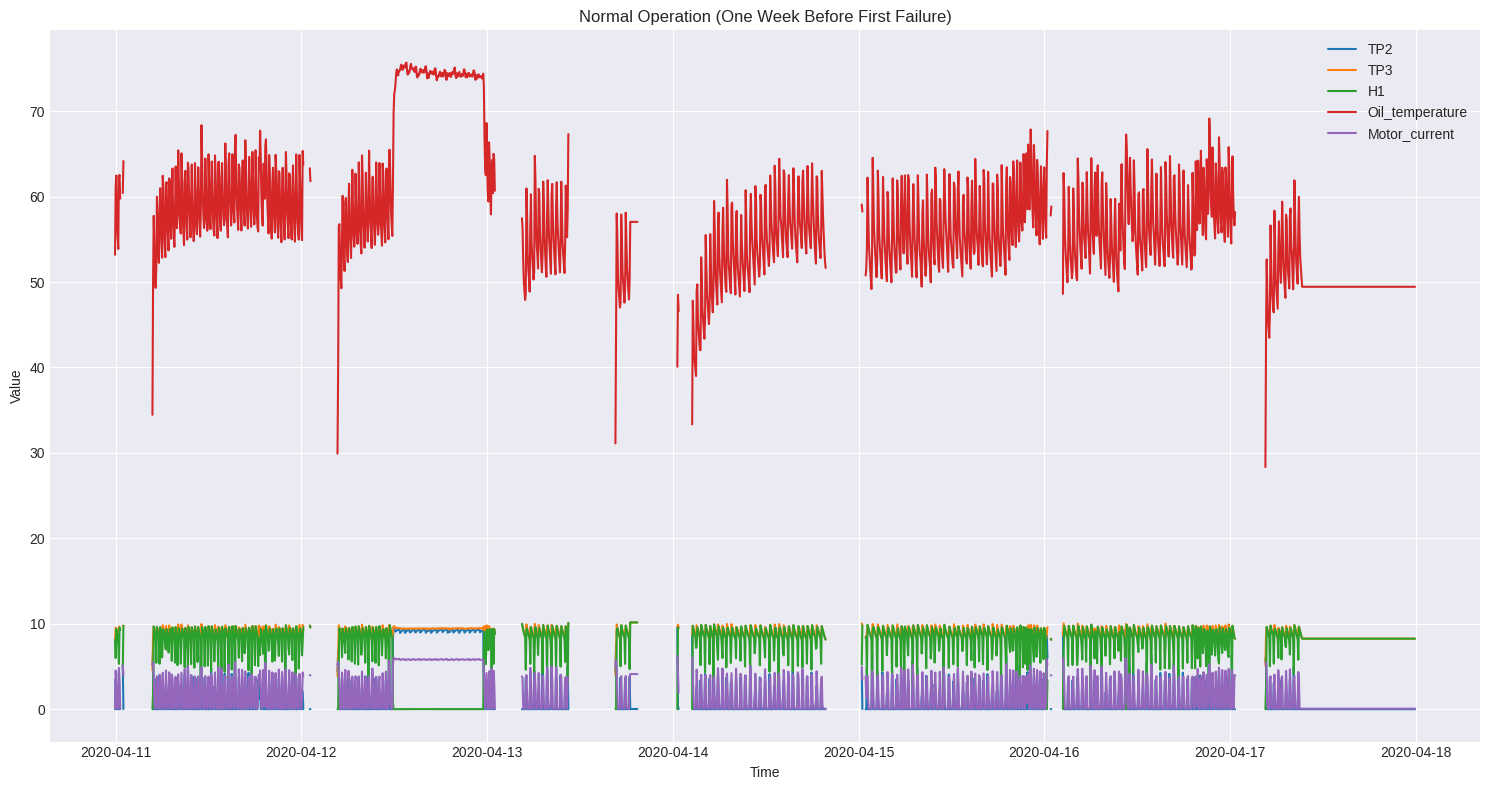

<ipython-input-12-3af81eb0c939>:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()


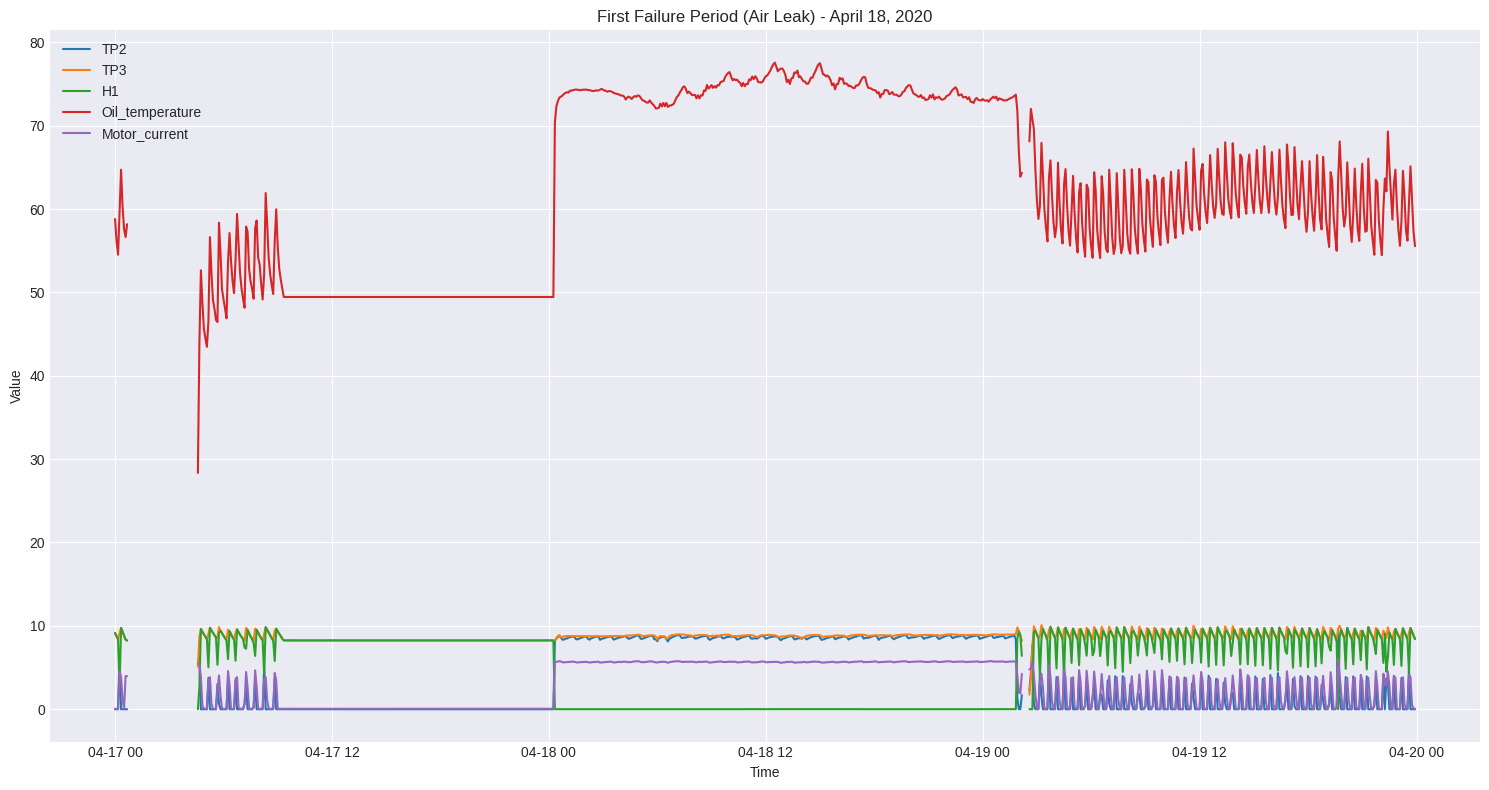

In [ ]:
# visualizing the time series data for key parameters

# plot _time_Series function will plot time series data for a specific time range
def plot_time_series(start_date, end_date, columns, title):
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    subset = df.loc[mask]

    if len(subset) == 0:
        print(f"No data available for the period {start_date} to {end_date}")
        return

    # Resample data to reduce plotting time (every 5 minutes)
    subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()

    plt.figure(figsize=(15, 8))
    for column in columns:
        plt.plot(subset_resampled['timestamp'], subset_resampled[column], label=column)

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ploting data for normal operation (before first failure)
normal_end = pd.to_datetime('2020-04-17 23:59:00')
normal_start = normal_end - timedelta(days=7)  # One week of normal operation
plot_time_series(normal_start, normal_end,
                ['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current'],
                'Normal Operation (One Week Before First Failure)')

# Ploting data around the first failure
failure1_start = pd.to_datetime('2020-04-17 00:00:00')  # Day before failure
failure1_end = pd.to_datetime('2020-04-19 23:59:00')    # Day after failure
plot_time_series(failure1_start, failure1_end,
                ['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current'],
                'First Failure Period (Air Leak) - April 18, 2020')

<ipython-input-12-3af81eb0c939>:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()


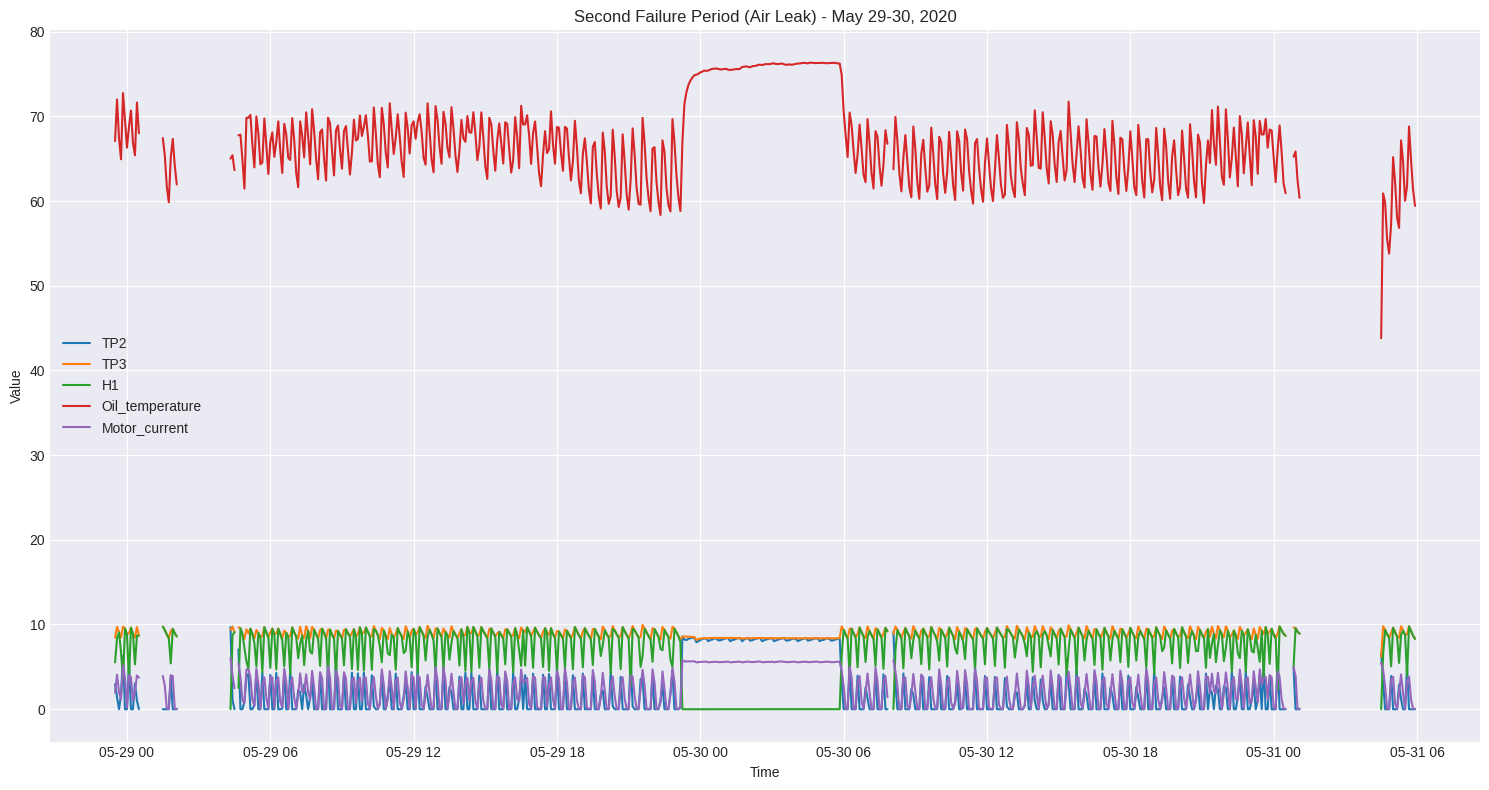

<ipython-input-12-3af81eb0c939>:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()


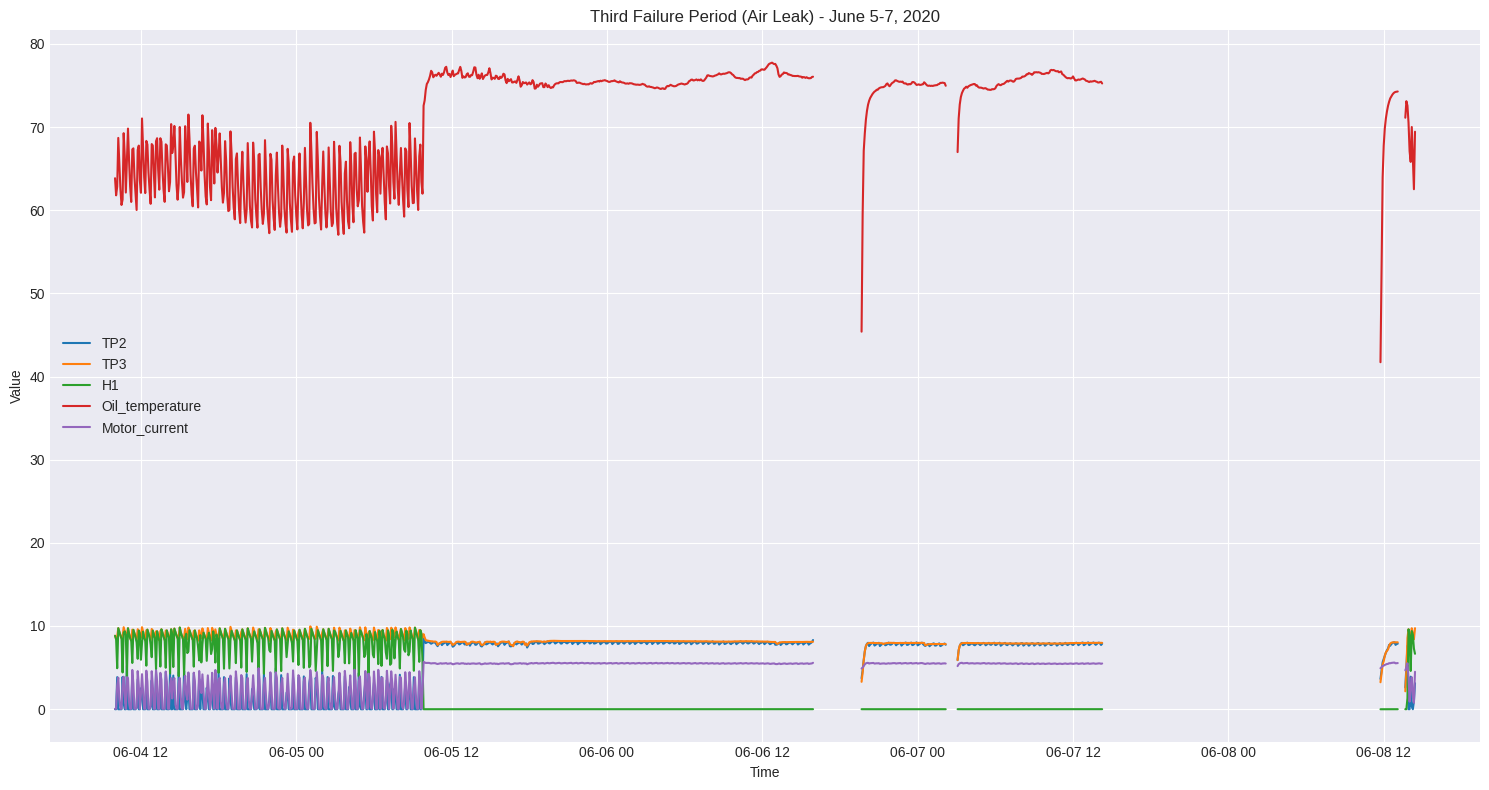

In [ ]:
# Ploting data around the second failure
failure2_start = pd.to_datetime('2020-05-28 23:30:00')  # Day before failure
failure2_end = pd.to_datetime('2020-05-31 06:00:00')    # Day after failure
plot_time_series(failure2_start, failure2_end,
                ['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current'],
                'Second Failure Period (Air Leak) - May 29-30, 2020')

# Ploting data around the third failure
failure3_start = pd.to_datetime('2020-06-04 10:00:00')  # Day before failure
failure3_end = pd.to_datetime('2020-06-08 14:30:00')    # Day after failure
plot_time_series(failure3_start, failure3_end,
                ['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current'],
                'Third Failure Period (Air Leak) - June 5-7, 2020')

<ipython-input-12-3af81eb0c939>:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  subset_resampled = subset.set_index('timestamp').resample('5T').mean().reset_index()


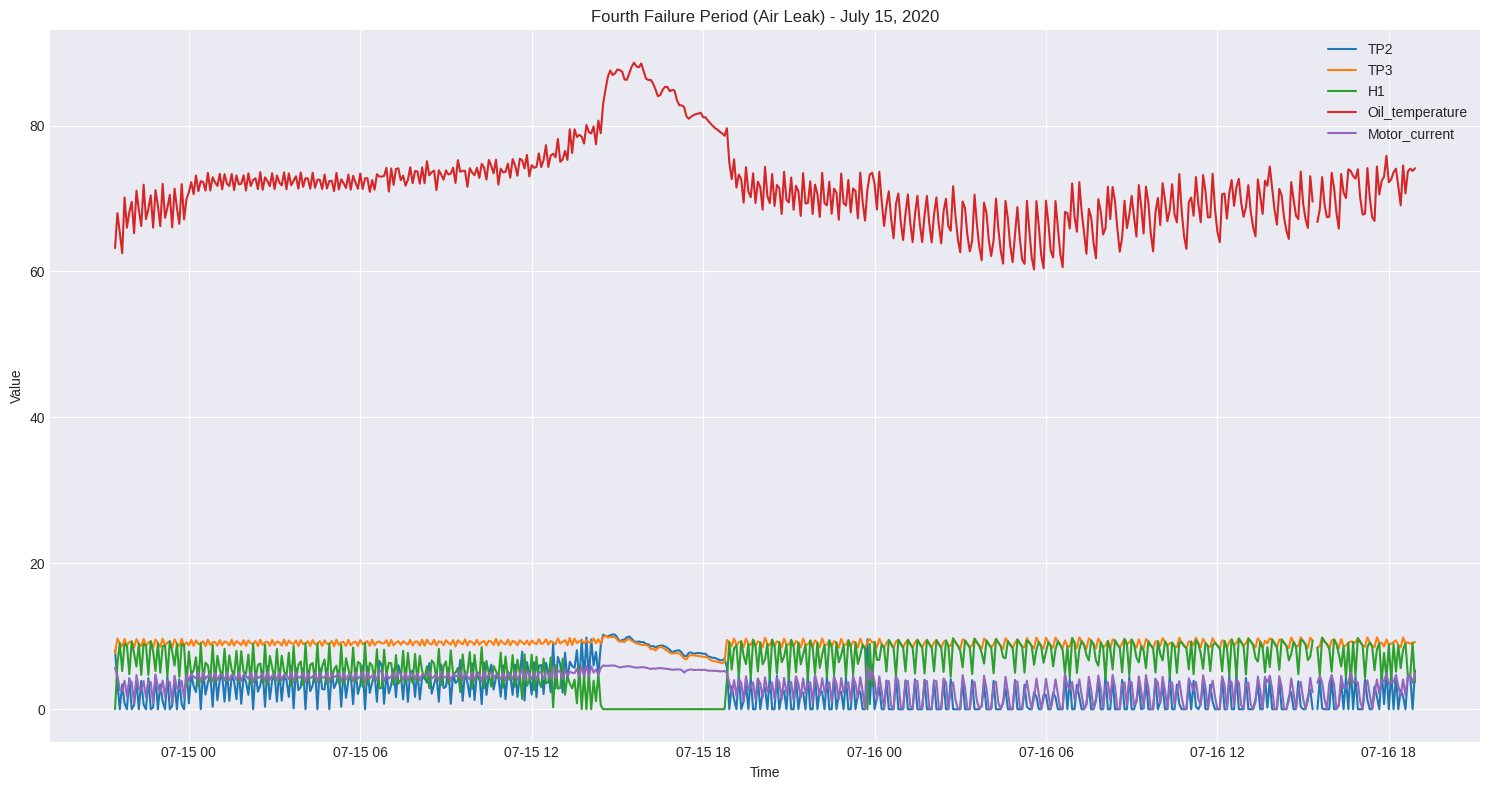

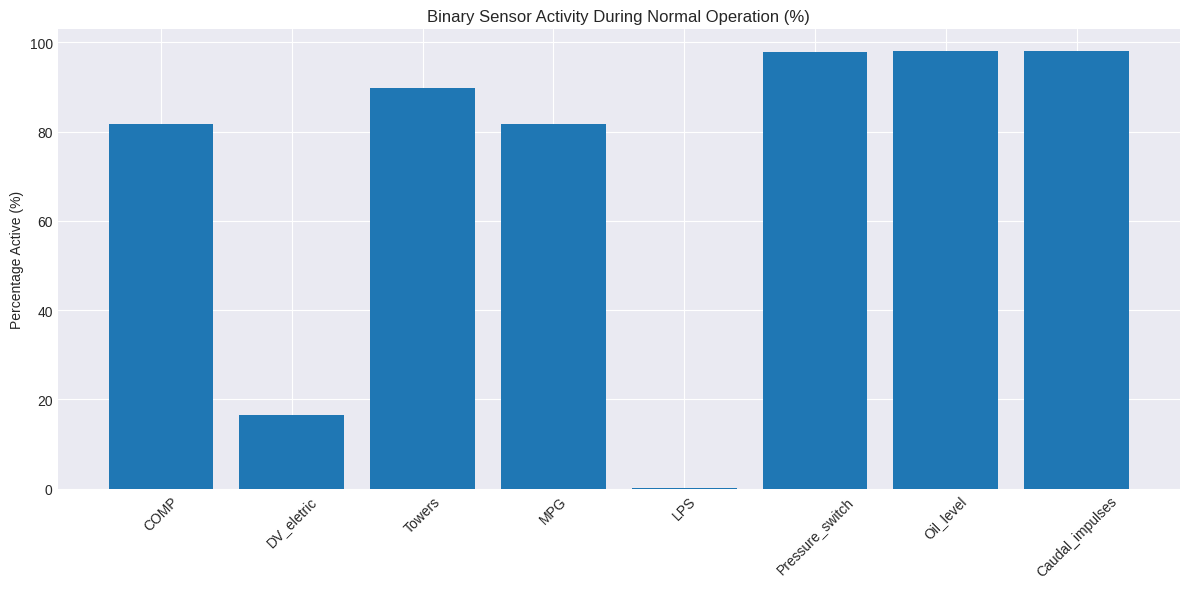

In [ ]:
# Ploting data around the fourth failure
failure4_start = pd.to_datetime('2020-07-14 14:30:00')  # Day before failure
failure4_end = pd.to_datetime('2020-07-16 19:00:00')    # Day after failure
plot_time_series(failure4_start, failure4_end,
                ['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current'],
                'Fourth Failure Period (Air Leak) - July 15, 2020')

# Let's analyze the various binary sensor values during failures to know which are getting more effected.

binary_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Function to analyze binary sensors during failure periods
def analyze_binary_sensors(start_date, end_date, title):
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    subset = df.loc[mask]

    if len(subset) == 0:
        print(f"No data available for the period {start_date} to {end_date}")
        return

    # Calculate the percentage of time each binary sensor is active
    binary_stats = {}
    for col in binary_columns:
        binary_stats[col] = subset[col].mean() * 100  # Percentage

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.bar(binary_stats.keys(), binary_stats.values())
    plt.title(f'Binary Sensor Activity During {title} (%)')
    plt.ylabel('Percentage Active (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return binary_stats

# Analyze binary sensors during normal operation
normal_binary_stats = analyze_binary_sensors(normal_start, normal_end, 'Normal Operation')

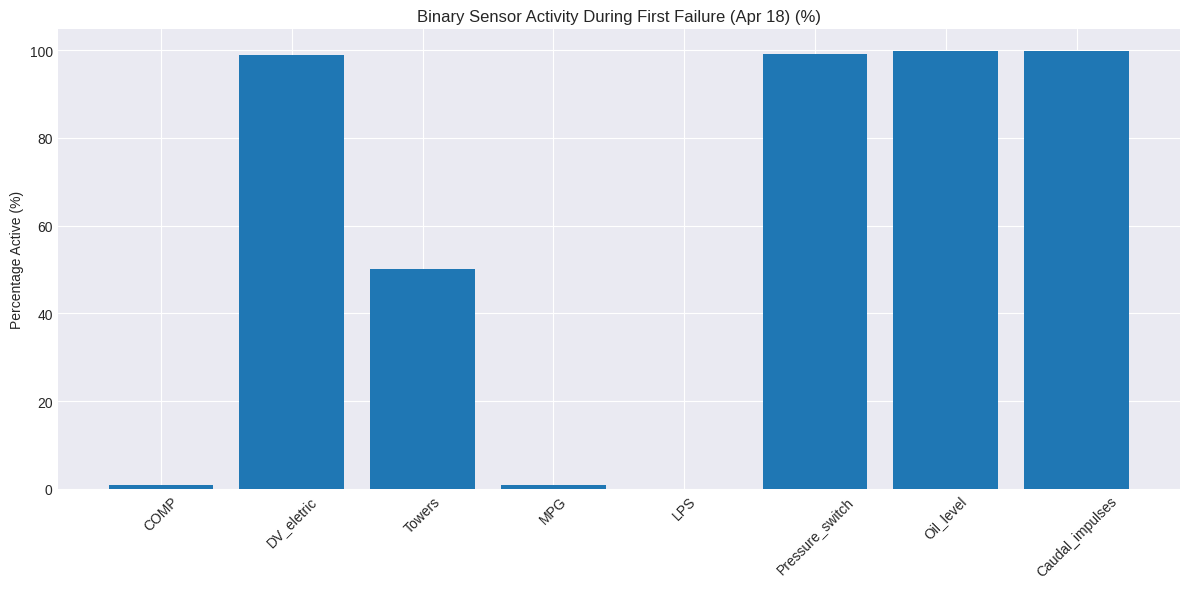

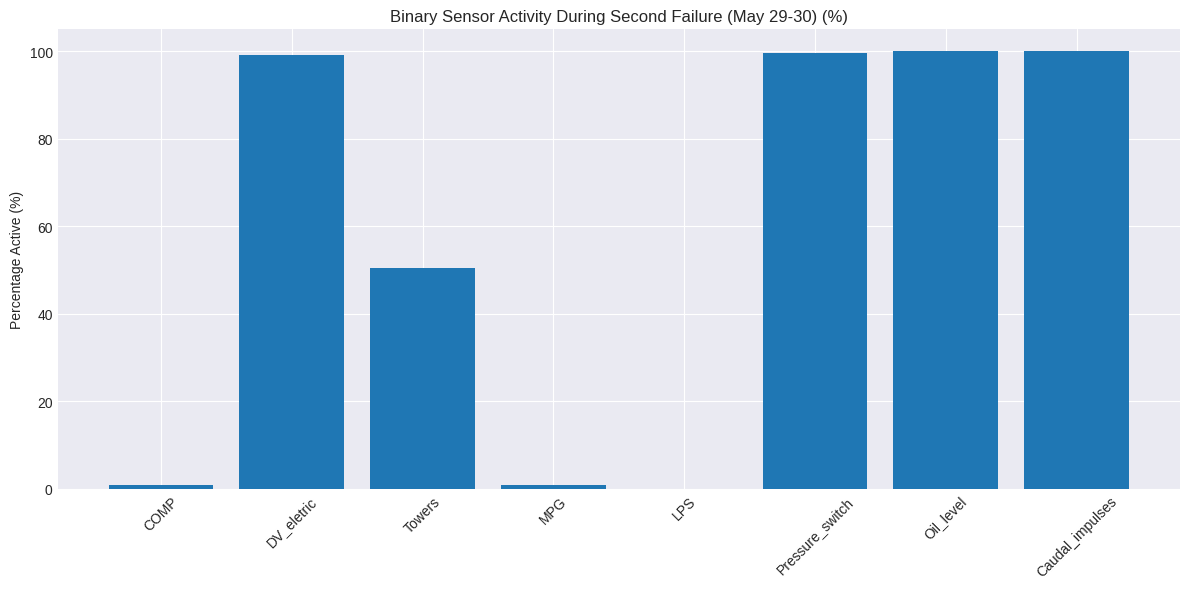

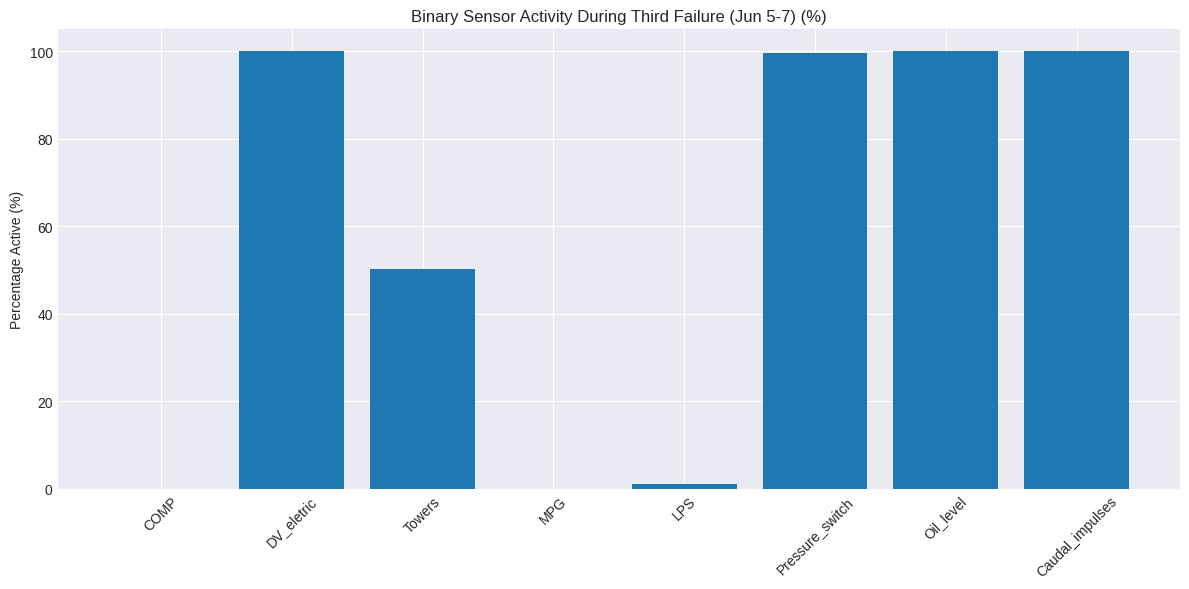

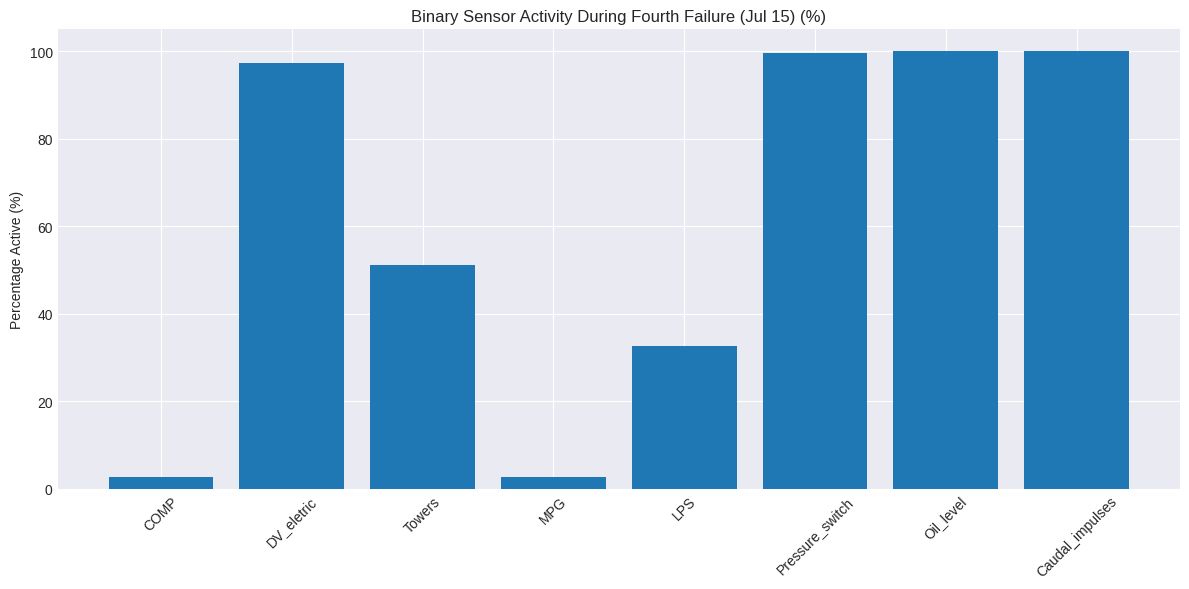

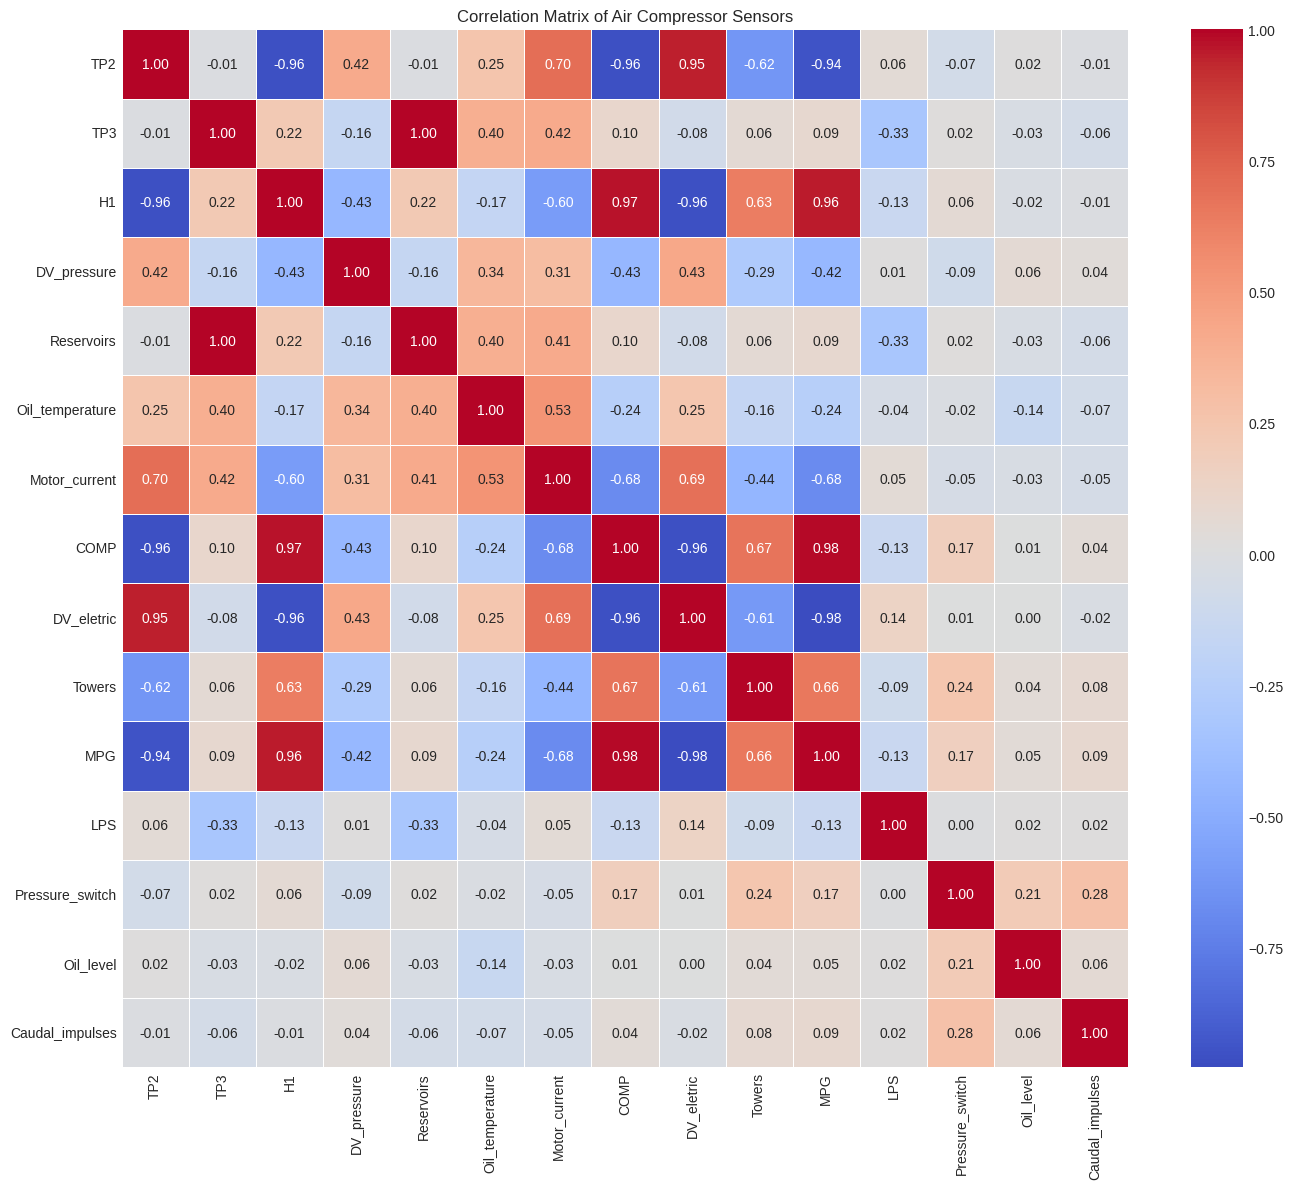

In [ ]:
# Analyzing binary sensors during each failure period
#It will give indication which are efffecting a lot
failure1_binary_stats = analyze_binary_sensors(
    pd.to_datetime('2020-04-18 00:00:00'),
    pd.to_datetime('2020-04-18 23:59:00'),
    'First Failure (Apr 18)'
)

failure2_binary_stats = analyze_binary_sensors(
    pd.to_datetime('2020-05-29 23:30:00'),
    pd.to_datetime('2020-05-30 06:00:00'),
    'Second Failure (May 29-30)'
)

failure3_binary_stats = analyze_binary_sensors(
    pd.to_datetime('2020-06-05 10:00:00'),
    pd.to_datetime('2020-06-07 14:30:00'),
    'Third Failure (Jun 5-7)'
)

failure4_binary_stats = analyze_binary_sensors(
    pd.to_datetime('2020-07-15 14:30:00'),
    pd.to_datetime('2020-07-15 19:00:00'),
    'Fourth Failure (Jul 15)'
)

# Let's look at the correlation between variables
# Sample the data to make correlation calculation faster
#took a random sample of 100,000 from 1.5 million samples
sampled_df = df.sample(n=100000, random_state=42)
correlation = sampled_df.drop(['Unnamed: 0', 'timestamp'], axis=1).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Compressor Sensors')
plt.tight_layout()
plt.show()

In [ ]:
# First lets create a new column 'failure_label' initialized to 0
df['failure_label'] = 0

# Mark records that fall in any of the failure periods as failure=1
failure_periods = [
    (pd.to_datetime('2020-04-18 00:00:00'), pd.to_datetime('2020-04-18 23:59:00')),
    (pd.to_datetime('2020-05-29 23:30:00'), pd.to_datetime('2020-05-30 06:00:00')),
    (pd.to_datetime('2020-06-05 10:00:00'), pd.to_datetime('2020-06-07 14:30:00')),
    (pd.to_datetime('2020-07-15 14:30:00'), pd.to_datetime('2020-07-15 19:00:00'))
]

for start_time, end_time in failure_periods:
    mask = (df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)
    df.loc[mask, 'failure_label'] = 1

# Checking labels distribution
print('Failure label value counts:')
print(df['failure_label'].value_counts())

Failure label value counts:
failure_label
0    1486994
1      29954
Name: count, dtype: int64


To equally distribute we will take equal number of varibales on failure label.

# **MODEL TRAINING**